Text(0, 0.5, 'Derivative Approximation')

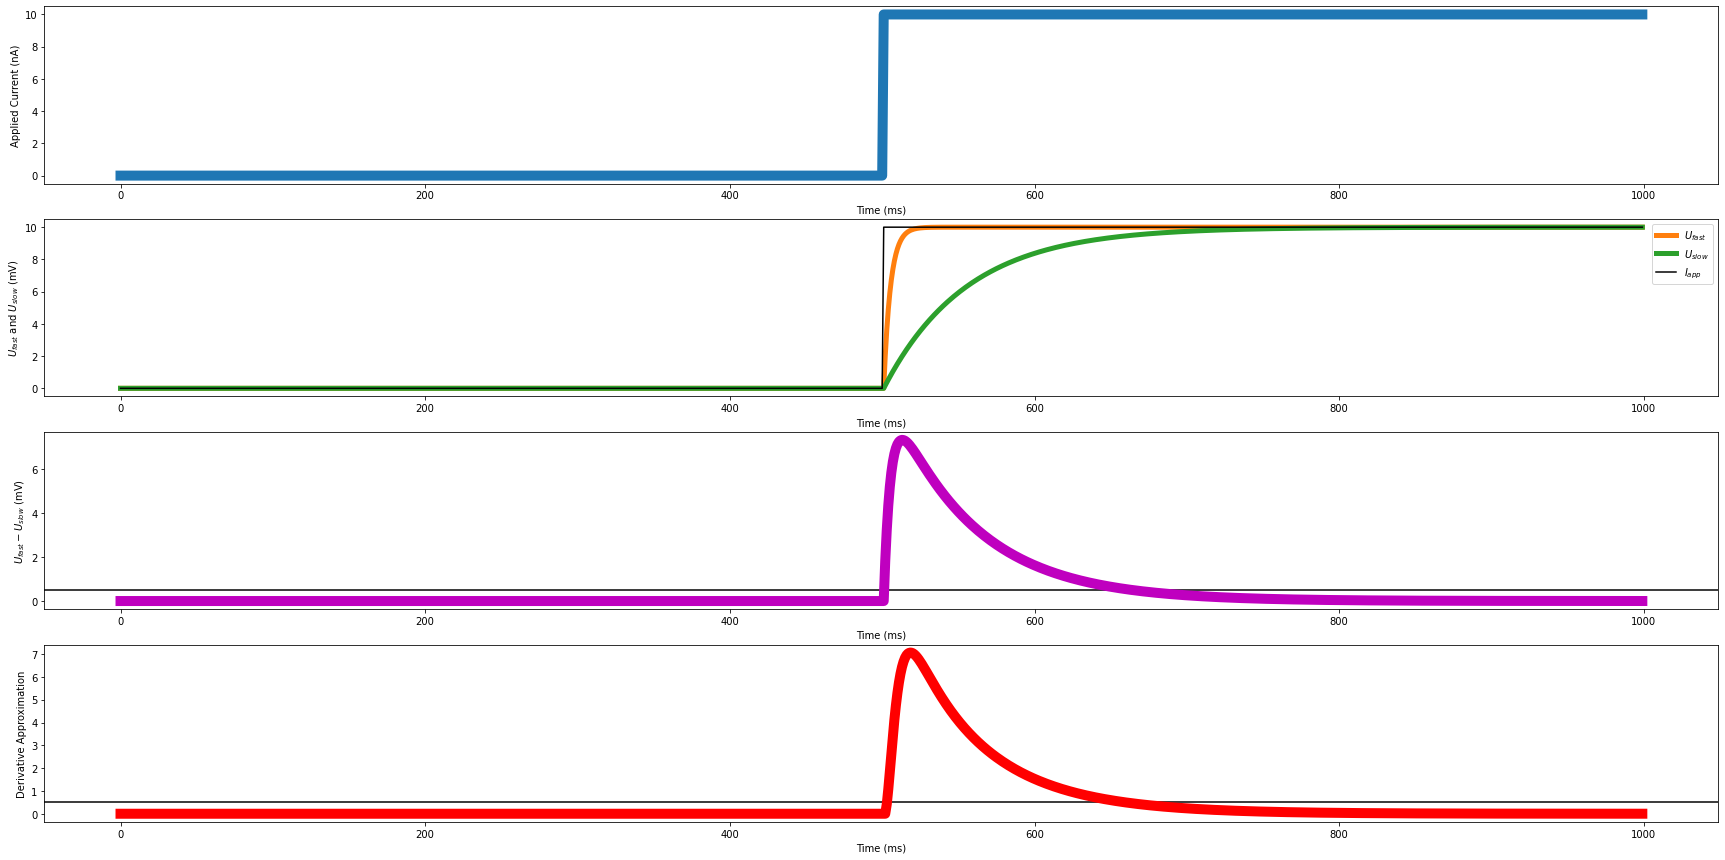

In [1]:
# William Nourse
# Feb 16 2021

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ipywidgets import interact_manual
#%matplotlib widget

Gm = 1 # uS
Er = -60 # mV
dt = 1 # ms
tMax = 1000 # ms
R = 20 # mV

t = np.arange(0,tMax,dt)
numSteps = np.size(t)

Cfast = 5 #nF
Cslow = 55 #nF

b=10e-3
c=10


tauFast = Cfast/Gm
tauSlow = Cslow/Gm

U1 = np.zeros(numSteps)
U2 = np.zeros(numSteps)
U3 = np.zeros(numSteps)

# Assemble subtraction network
Eex = 100
Ein = -100
k = 1
delEex = Eex - Er
delEin = Ein - Er
gEx = k*R/(delEex - k*R)
gIn = -gEx*delEex/delEin

Iapp = b*t
Iapp = b*t +(t>tMax/2)*(b*(t-tMax/2))
#Iapp = b*t -(t>tMax/2)*(b*(t-tMax/2))
Iapp = c*(t>tMax/2)

# Simulate
for i in range(1,numSteps):
    U1[i] = U1[i-1] + dt/Cfast*(Iapp[i-1]-Gm*U1[i-1])
    U2[i] = U2[i-1] + dt/Cslow*(Iapp[i-1]-Gm*U2[i-1])
    U3[i] = U3[i-1] + dt/Cfast*(min(max(U1[i-1]/R,0),1)*gEx*(delEex-U3[i-1]) + min(max(U2[i-1]/R,0),1)*gIn*(delEin-U3[i-1]) - Gm*U3[i-1])
plt.figure(figsize=(30,15))
plt.subplot(4,1,1)
plt.plot(t,Iapp,linewidth=10)
plt.xlabel('Time (ms)')
plt.ylabel('Applied Current (nA)')
plt.subplot(4,1,2)
plt.plot(t,U1,linewidth=5,color='C1',label='$U_{fast}$')
plt.plot(t,U2,linewidth=5,color='C2',label='$U_{slow}$')
plt.plot(t,Iapp,color='k',label='$I_{app}$')
plt.xlabel('Time (ms)')
plt.ylabel('$U_{fast}$ and $U_{slow}$ (mV)')
plt.legend()
plt.subplot(4,1,3)
plt.axhline(y=b*(tauSlow-tauFast),color='k')
plt.plot(t,U1-U2,linewidth=10,color='m')
plt.xlabel('Time (ms)')
plt.ylabel('$U_{fast}-U_{slow}$ (mV)')
plt.subplot(4,1,4)
plt.axhline(y=b*(tauSlow-tauFast),color='k')
plt.plot(t,U3,linewidth=10,color='r')
plt.xlabel('Time (ms)')
plt.ylabel('Derivative Approximation')

# Takeaway: The 'Fast' and 'Slow' neurons act as time-delayed versions of the input, and the output approximates their difference. However the result isn't perfect, because as the inputs get bigger the synaptic conductances reduce sensitivity to new inputs